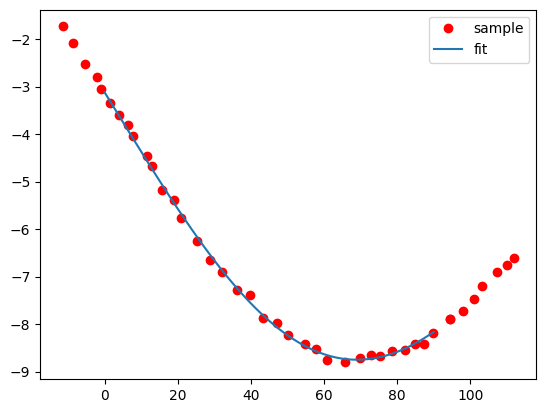

[ 0.6107392   0.59574158  0.63861399  0.50500312  0.52458624  0.471631
  0.0045929   0.019095   -0.02303625 -0.00175393 -0.01760975  0.01796079]


In [5]:
import numpy as np
from scipy.optimize import least_squares
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルの読み込み
csv_file_path = 'xy(3).csv'
data = pd.read_csv(csv_file_path)

# xとyのデータを抽出
x_data = data.iloc[:, 0].values  # CSVファイルの1列目をxとして使用
y_data = data.iloc[:, 1].values  # CSVファイルの2列目をyとして使用

# ロドリゲスの回転公式×磁場ベクトル
def rodrigues_rotation(n, s, theta):
    n = n[:, np.newaxis]
    s = s[:, np.newaxis]
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    h = s * cos_theta + np.cross(n, s, axis=0) * sin_theta + n * np.dot(n.T, s) * (1 - cos_theta)
    return h

# モデル関数
def model(params, x_data):
    n = np.array([params[0], params[1], params[2]])
    s = np.array([params[3], params[4], params[5]])
    XX = params[6]
    XY = params[7]
    YY = params[8]
    YZ = params[9]
    XZ = params[10]
    ZZ = params[11]
    K = np.array([[XX, XY, XZ], [XY, YY, YZ], [XZ, YZ, ZZ]])
    
    theta = np.radians(x_data)
    h_vec = rodrigues_rotation(n, s, theta)
    
    K_rot = np.zeros_like(theta)  # K_rot の初期化
    
    for j in range(len(theta)):
        h = h_vec[:, j]
        K_rot[j] = np.dot(h, np.dot(K, h)) * 1e4
    
    return K_rot

def residual(params, x_data, y_data):
    return model(params, x_data) - y_data

plt.plot(x_data, y_data, 'ro', ls='', label='sample')

# ユーザーからパラメータを入力させる関数
par = []
for param in ['n1', 'n2', 'n3', 's1', 's2', 's3', 'K_{xx}', 'K_{xy}', 'K_{yy}', 'K_{yz}', 'K_{xz}', 'K_{zz}']:
    value = float(input(f"Enter value for {param}: "))
    par.append(value)

res = least_squares(residual, par, args=(x_data, y_data))

x_data_fit = np.linspace(0, 90, 100)
y_data_fit = model(res.x, x_data_fit)
plt.plot(x_data_fit, y_data_fit, label='fit')
plt.legend()
plt.show()
print(res.x)